In [1]:
import librosa
import librosa.display
from spectrogram_class import spectrogram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spec_input_generator import gen, gen_eval
import numpy as np

In [19]:
(np.random.randint(0, 2, size=10000) == np.random.randint(0, 2, size=10000)).mean()

0.4963

In [20]:
hop_length = 2048
win_length = 512
n_fft = 1024

(256, 500)
(256, 500) HIT


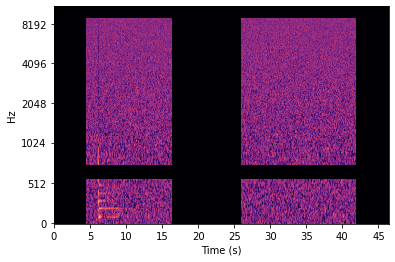

In [21]:
%run spectrogram_class.py

In [2]:
meta_df = pd.read_csv('../data/OrchideaSOL_metadata.csv')

In [23]:
meta_df.head(2)

,Path,Family (abbr.),Family (in full),Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID (if applicable),Dynamics,Dynamics ID (if applicable),Instance ID,Mute (abbr.),Mute (in full),String ID (if applicable),Needed digital retuning,Fold
0,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,f,3.0,0.0,S,Sordina,NaN,False,2
1,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,p,1.0,0.0,S,Sordina,NaN,True,0


In [31]:
meta_freq = 1/meta_df.groupby('Instrument (in full)')['Instrument (in full)'].transform('count')

In [32]:
meta_freq

0        0.002000
1        0.002000
2        0.002000
3        0.002000
4        0.002000
           ...   
13260    0.002653
13261    0.002653
13262    0.002653
13263    0.002653
13264    0.002653
Name: Instrument (in full), Length: 13265, dtype: float64

In [59]:
meta_df.sample(10000000, 
            replace = True, 
            weights=meta_freq)[['Instrument (in full)']].value_counts(normalize=True)

Instrument (in full)
Bassoon                 0.062650
Clarinet in Bb          0.062580
Bass Tuba               0.062570
Contrabass              0.062550
Violin                  0.062550
Accordion               0.062512
Viola                   0.062506
Trombone                0.062477
Guitar                  0.062475
French Horn             0.062467
Alto Saxophone          0.062452
Harp                    0.062451
Trumpet in C            0.062450
Flute                   0.062448
Cello                   0.062448
Oboe                    0.062413
dtype: float64

In [6]:
meta_df.sample(1)['Path'].values[0]

'Strings/Viola/ordinario/Va-ord-A4-ff-3c-R100d.wav'

In [7]:
test_spec = spectrogram(meta_df.sample(1)['Path'].values[0])

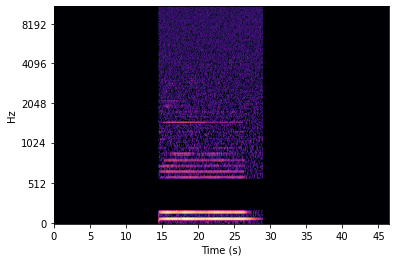

In [8]:
test_spec.plot_spec()

In [9]:
test, _ = librosa.load('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', 
                    sr = None)

In [10]:
test.shape

(826215,)

In [11]:
def mask_spec(arr, inplace = False):
    loop = random.randint(1, 2)
    tmp = arr.copy()
    for i in range(loop):
        start = random.randint(0, arr.shape[1])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[:, start:start + duration] = 0
        else:
            tmp[:, start:start+duration] = 0
    freq_loop = random.randint(1, 3)
    for freq in range(freq_loop):
        start = random.randint(0, arr.shape[0])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[start:start + duration, :] = 0
        else:
            tmp[start:start + duration, :] = 0

    return None if inplace == True else tmp


In [12]:
# librosa.display.specshow(librosa.amplitude_to_db(mask_spec(spec_sample)), y_axis='log', x_axis = 's')

In [13]:
import random
print(random.randint(0, 9))

0


In [14]:
print(random.randint.__doc__)

Return random integer in range [a, b], including both end points.
        


In [3]:
test, _ = next(gen(meta_df))

In [5]:
print(test)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [17]:
np.load('/home/shiya/Documents/Music_transcription_fastai/data/_OrchideaSOL2020_release/OrchideaSOL2020/Strings/Violin/ordinario/Vn-ord-A3-ff-4c-N.npy', 
            allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/shiya/Documents/Music_transcription_fastai/data/_OrchideaSOL2020_release/OrchideaSOL2020/Strings/Violin/ordinario/Vn-ord-A3-ff-4c-N.npy'

In [ ]:
0 in test

True

In [ ]:
print(test.shape)

(256, 500, 1)


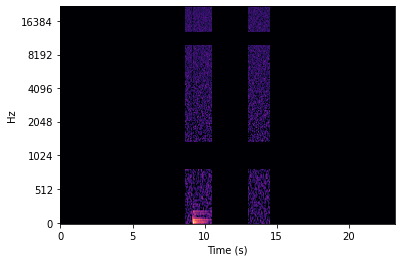

In [ ]:
librosa.display.specshow(librosa.amplitude_to_db(np.reshape(test, newshape = test.shape[:2])), x_axis = 's', 
                                                y_axis = 'mel', sr=44100, hop_length=2048, 
                                                n_fft=2048)

In [ ]:
sample = meta_df.sample(1)

In [ ]:
sample['Path'].values

array(['PluckedStrings/Harp/ordinario/Hp-ord-B2-pp-N-N.wav'], dtype=object)

In [ ]:
spec = spectrogram(sample['Path'].values[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] HIT
(256, 428)


In [ ]:
sample['Path']

8462    Strings/Violin/ordinario/Vn-ord-C#4-pp-4c-N.wav
Name: Path, dtype: object

In [ ]:
np.save('testnig.npy', spec.spec)

In [ ]:
!ls

/bin/bash: /home/shiya/anaconda3/envs/music/lib/libtinfo.so.6: no version information available (required by /bin/bash)
__init__.py			 spectrogram_class.py
model.png			 spectrogram.py
music_transcription_2conv.ipynb  test.ipynb
music_transcription_class.ipynb  testnig.npy
music_transcription.ipynb	 wav_converter_class.py
__pycache__			 wav_converter.py
spec_input_generator.py


In [ ]:
load_test = np.load('testnig.npy', allow_pickle = True)

In [ ]:
load_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
load_test.shape

()